In [2]:
#Breast Cancer Data analysis
import pandas as pd
import numpy as np
metabric_df =  pd.read_csv('METABRIC_RNA_Mutation.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\1683544268.py:4: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  metabric_df =  pd.read_csv('METABRIC_RNA_Mutation.csv')


In [62]:
# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from scipy import stats

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
import kmapper as km
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [43]:
pip install kmapper


     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     -------------------------------------  122.9/126.0 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
metabric_df.head(3)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


The dataset comprises 693 columns; thus, I opted to select only the necessary columns pertinent to my project. This decision allowed me to conduct specific modifications in my analysis.

In [4]:
metabric_df = metabric_df.loc[:,"patient_id":"death_from_cancer"]
num_rows, num_columns = metabric_df.shape
print('Metrabic_df:')
print('number of rows :', num_rows, 'columns:', num_columns)

metabric_df.head(3)

Metrabic_df:
number of rows : 1904 columns: 31


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease


Data cleaning| Before delving into the analysis, I aim to identify whether there are any missing values in my dataset that could potentially disrupt or influence the analysis process

In [7]:
# checking percentage of missing value
print(metabric_df.isnull().sum()/len(metabric_df)*100)

patient_id                         0.000000
age_at_diagnosis                   0.000000
type_of_breast_surgery             1.155462
cancer_type                        0.000000
cancer_type_detailed               0.787815
cellularity                        2.836134
chemotherapy                       0.000000
pam50_+_claudin-low_subtype        0.000000
cohort                             0.000000
er_status_measured_by_ihc          1.575630
er_status                          0.000000
neoplasm_histologic_grade          3.781513
her2_status_measured_by_snp6       0.000000
her2_status                        0.000000
tumor_other_histologic_subtype     0.787815
hormone_therapy                    0.000000
inferred_menopausal_state          0.000000
integrative_cluster                0.000000
primary_tumor_laterality           5.567227
lymph_nodes_examined_positive      0.000000
mutation_count                     2.363445
nottingham_prognostic_index        0.000000
oncotree_code                   

Some variables have missing values while others not.

Analysing stage| Correlation between attributes

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\1610898449.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(no_id_df.corr(), dtype=np.bool_))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\1610898449.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(no_id_df.corr(), ax=axs, mask=mask, cmap=sns.diverging_palette(180, 10, as_cmap=True))


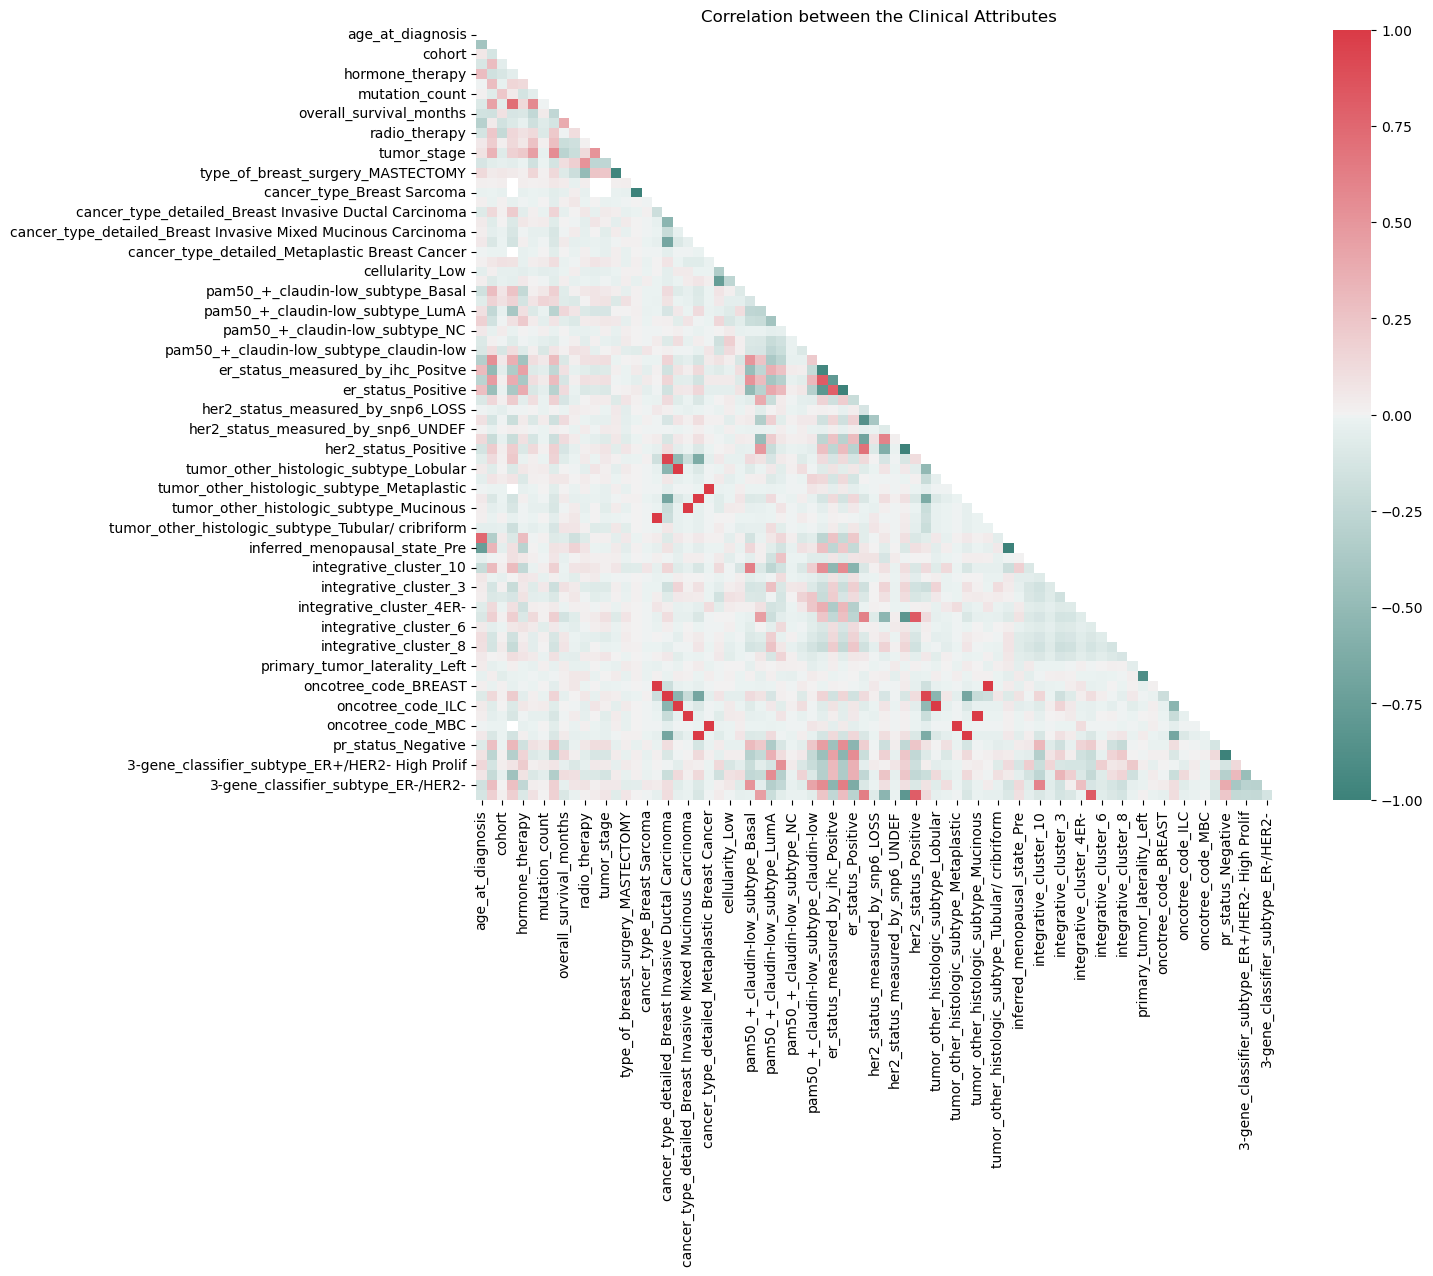

In [20]:
categorical_columns = metabric_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id', 'death_from_cancer']
categorical_columns = [col for col in categorical_columns if col not in unwanted_columns]

no_id_df = pd.get_dummies(metabric_df.drop('patient_id', axis=1), columns=categorical_columns)

fig, axs = plt.subplots(figsize=(13, 10))
mask = np.triu(np.ones_like(no_id_df.corr(), dtype=np.bool_))
sns.heatmap(no_id_df.corr(), ax=axs, mask=mask, cmap=sns.diverging_palette(180, 10, as_cmap=True))
plt.title('Correlation between the Clinical Attributes')
plt.show()


The correlation plot above reveals varying relationships between attributes. Some exhibit positive and negative correlations with other attributes, while certain ones demonstrate robust connections, contrasting with attributes that show weaker associations.

In [21]:
# Correlation attributes and overall survival
survival_corr = metabric_df.corr()['overall_survival'].sort_values(ascending=False)
survival_corr_df = pd.DataFrame({'Correlation': survival_corr})
survival_corr_df.head(10)
#All variables which have positive correlation with overall survival is weakly correlated (max correlation < 0.4)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\1533345358.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survival_corr = metabric_df.corr()['overall_survival'].sort_values(ascending=False)


,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
radio_therapy,0.112083
chemotherapy,0.045625
hormone_therapy,-0.030401
mutation_count,-0.077741
neoplasm_histologic_grade,-0.086601
nottingham_prognostic_index,-0.138000
patient_id,-0.148052
cohort,-0.149645


In [22]:
# Statistical summaries of numeric attributes
num_attributes_columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count',
                          'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']
cat_attributes_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 
                          'overall_survival', 'radio_therapy', 'tumor_stage']

# Statistical summary for numerical clinical attributes in 'metabric_df'
metabric_df[num_attributes_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1859.0,5.697687,4.058778,1.00,3.000,5.000000,7.000000,80.00
nottingham_prognostic_index,1904.0,4.033019,1.144492,1.00,3.046,4.042000,5.040250,6.36
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
tumor_size,1884.0,26.238726,15.160976,1.00,17.000,23.000000,30.000000,182.00


In [25]:
# List of numeric and categorical attribute columns
num_attributes_columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count',
                          'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']
cat_attributes_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 
                          'overall_survival', 'radio_therapy', 'tumor_stage']

# Including all columns with object datatype as categorical
cat_attributes_columns.extend(metabric_df.select_dtypes(include=['object']).columns.tolist())

# Statistical summary for categorical clinical attributes in 'metabric_df'
categorical_summary = metabric_df[cat_attributes_columns].astype('category').describe().T
categorical_summary.head()

,count,unique,top,freq
chemotherapy,1904,2,0,1508
cohort,1904.0,5.0,3.0,734.0
neoplasm_histologic_grade,1832.0,3.0,3.0,927.0
hormone_therapy,1904,2,1,1174
overall_survival,1904,2,0,1103


In [26]:
# Filtering the DataFrame for the no treatment group
no_treatment = metabric_df[(metabric_df['chemotherapy'] == 0) & 
                           (metabric_df['hormone_therapy'] == 0) & 
                           (metabric_df['radio_therapy'] == 0)]

# Calculating and displaying statistics for the no treatment group and baseline survival proportion
print("Number of patients who had no treatment:", no_treatment.shape[0])
print("Proportion of survival with no treatment:", ("%.3f" % no_treatment["overall_survival"].mean()))
print("Baseline proportion of survival in all groups:", ("%.3f" % metabric_df["overall_survival"].mean()))

Number of patients who had no treatment: 289
Proportion of survival with no treatment: 0.381
Baseline proportion of survival in all groups: 0.421


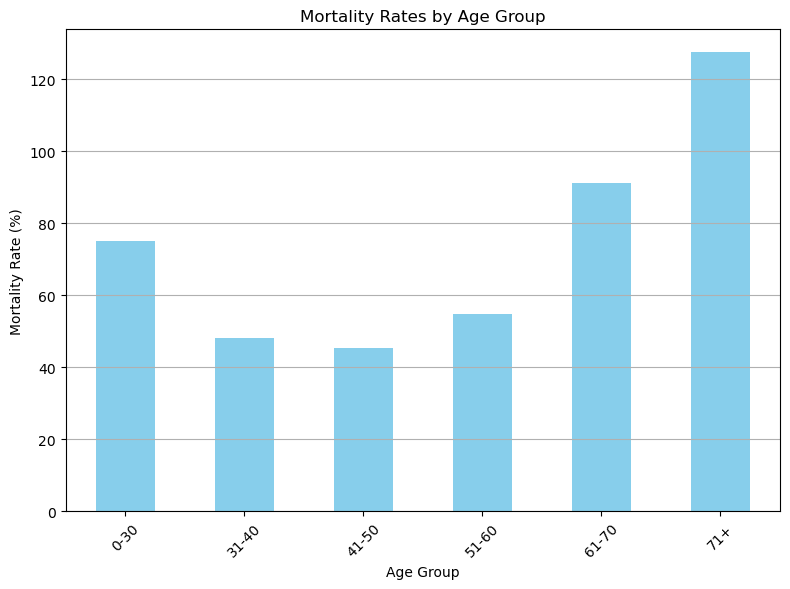

In [27]:
#Analyzing how different age groups correlate with mortality rates
selected_columns = ['age_at_diagnosis', 'death_from_cancer']
age_and_death = metabric_df[selected_columns].copy()

age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Categorize ages into groups
age_and_death['age_group'] = pd.cut(age_and_death['age_at_diagnosis'], bins=age_bins, labels=age_labels, right=False)

# Mapping categorical 'death_from_cancer' values to numeric values representing mortality rates
mapping = {
    'Living': 0,  # Representing survival
    'Died of Disease': 1,  # Mortality due to disease
    'Died of Other Causes': 2,  # Mortality due to other causes
    'Unknown': 3  # Unknown mortality status
}

# Map categorical values to numeric values
age_and_death['mortality_numeric'] = age_and_death['death_from_cancer'].map(mapping)

# Calculate mean numeric mortality rates per age group
mortality_by_age_group = age_and_death.groupby('age_group')['mortality_numeric'].mean() * 100

import matplotlib.pyplot as plt

# Plotting mortality rates by age group
plt.figure(figsize=(8, 6))
mortality_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Mortality Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [30]:
died_of_disease = age_and_death[age_and_death['death_from_cancer'] == 'Died of Disease']

# Calculate mean age for 'Died of Disease'
mean_age_died_of_disease = died_of_disease['age_at_diagnosis'].mean()

print(f"The mean age for 'Died of Disease' category is: {mean_age_died_of_disease}")

The mean age for 'Died of Disease' category is: 60.4675080385852


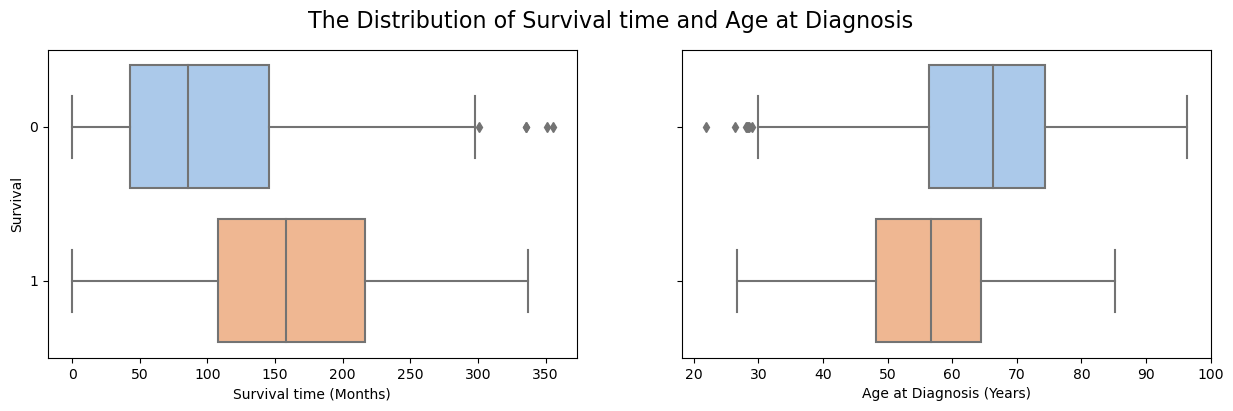

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=metabric_df, ax=ax[0], palette='pastel')
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=metabric_df, ax=ax[1], palette='pastel')

fig.suptitle('The Distribution of Survival time and Age at Diagnosis', fontsize=16)

ax[0].set_xlabel('Survival time (Months)')
ax[0].set_ylabel('Survival')
ax[1].set_xlabel('Age at Diagnosis (Years)')
ax[1].set_ylabel('')

plt.show()

The disparity between age distributions suggests a higher likelihood of non-survival among patients diagnosed with breast cancer at older ages. Additionally, the duration from intervention to the endpoint—death or the current time—is notably lengthier for surviving patients. This indicates a dichotomy where individuals either succumb to breast cancer at earlier stages or successfully survive

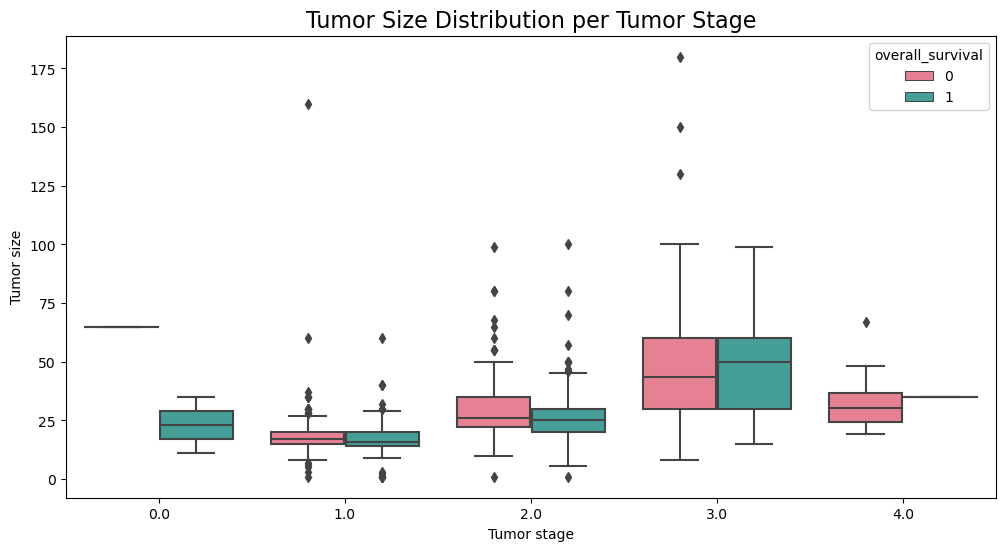

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='tumor_stage', y='tumor_size', data=metabric_df, orient='v', hue='overall_survival', palette='husl')
ax.set_ylabel('Tumor size')
ax.set_xlabel('Tumor stage')
plt.title('Tumor Size Distribution per Tumor Stage', fontsize=16)
plt.show()

Stage 0.0

Patients who died have same tumor size, around 60-70
Patients who survived have tumor size between 15-35
Stage 1.0 Patients who died and survived has relatively same tumor size distribution, except 1 died patients whose tumor size > 150

Stage 2.0 Patients who died and survived has a little bit difference in tumor size distribution and has almost the same median

Stage 3.0

Patients who died have variety of tumor size, from around 10 to more than 175
Patients who survived have tumor size between around 20 and 100

Stage 4.0

Patients who died have tumor size between 20-70
Patients who survived have same tumor size, around 60-70

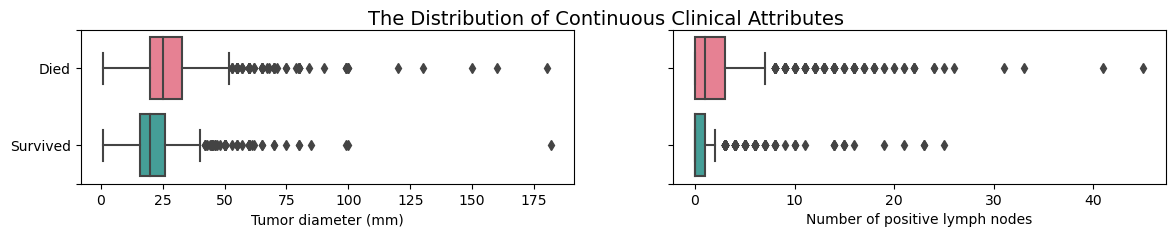

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(14, 2), sharey=True)

sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=metabric_df, ax=ax[0], palette='husl')
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=metabric_df, ax=ax[1], palette='husl')

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize=14)
plt.yticks([-0.5, 0, 1, 1.5], ['', 'Died', 'Survived', ''])

ax[0].set_xlabel('Tumor diameter (mm)')
ax[0].set_ylabel('')

ax[1].set_xlabel('Number of positive lymph nodes')
ax[1].set_ylabel('')

plt.show()


The minimum and maximum tumour diameters appear similar for both deceased and surviving patients. Notably, both distributions exhibit numerous outliers.
Among surviving patients, the minimum number of positive lymph nodes aligns with the median value. Conversely, the distribution of positive lymph nodes for deceased patients displays a broader range compared to survivors.

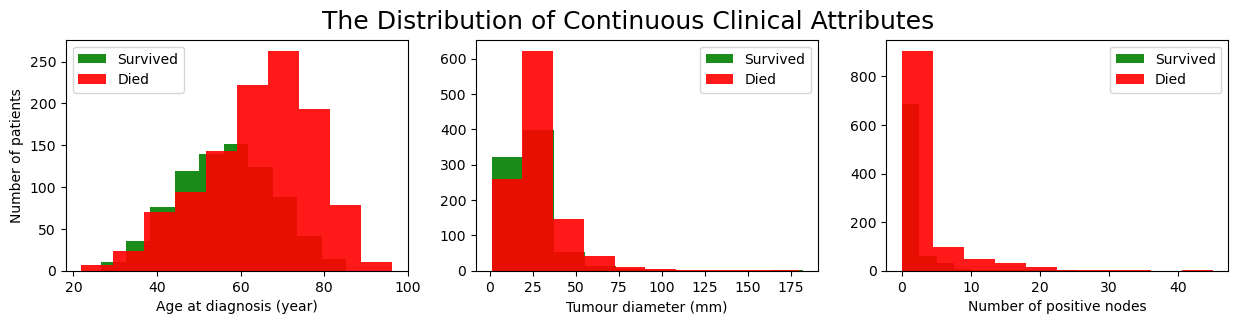

In [34]:

fig, ax = plt.subplots(ncols=3, figsize=(15, 3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize=18)

ax[0].hist(metabric_df[metabric_df['overall_survival'] == 1]['age_at_diagnosis'], alpha=0.9, color='green', label='Survived')
ax[0].hist(metabric_df[metabric_df['overall_survival'] == 0]['age_at_diagnosis'], alpha=0.9, color='red', label='Died')
ax[0].legend()

ax[1].hist(metabric_df[metabric_df['overall_survival'] == 1]['tumor_size'], alpha=0.9, color='green', label='Survived')
ax[1].hist(metabric_df[metabric_df['overall_survival'] == 0]['tumor_size'], alpha=0.9, color='red', label='Died')
ax[1].legend()

ax[2].hist(metabric_df[metabric_df['overall_survival'] == 1]['lymph_nodes_examined_positive'], alpha=0.9, color='green', label='Survived')
ax[2].hist(metabric_df[metabric_df['overall_survival'] == 0]['lymph_nodes_examined_positive'], alpha=0.9, color='red', label='Died')
ax[2].legend()

ax[0].set_xlabel('Age at diagnosis (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()


The median values for tumor size and the number of positive lymph nodes are lower in the group of patients who survived compared to those who didn't.
Additionally, there's a higher count of patients in the died class concerning the age at diagnosis compared to the survived class.

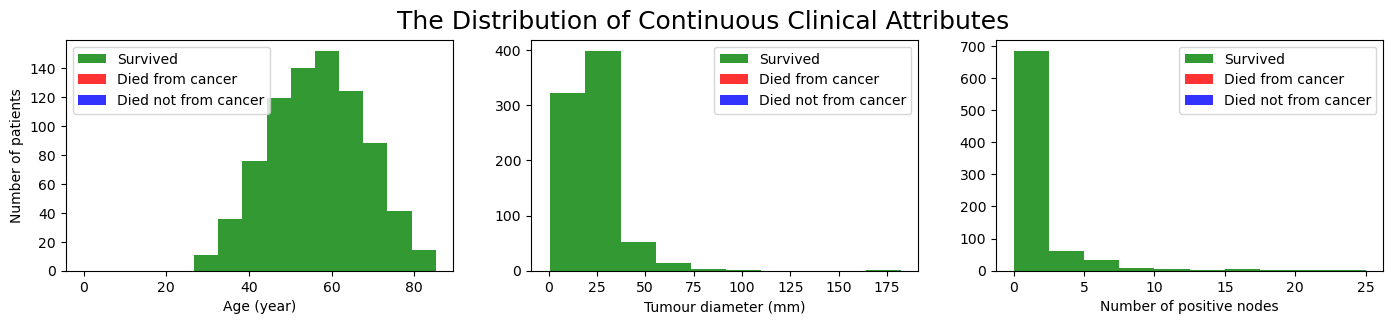

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3, figsize=(17, 3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize=18)

ax[0].hist(metabric_df[metabric_df['overall_survival'] == 1]['age_at_diagnosis'], alpha=0.8, color='green', label='Survived')
ax[0].hist(metabric_df[metabric_df['death_from_cancer'] == 1]['age_at_diagnosis'], alpha=0.8, color='red', label='Died from cancer')
ax[0].hist(metabric_df[metabric_df['death_from_cancer'] == 0]['age_at_diagnosis'], alpha=0.8, color='blue', label='Died not from cancer')
ax[0].legend()

ax[1].hist(metabric_df[metabric_df['overall_survival'] == 1]['tumor_size'], alpha=0.8, color='green', label='Survived')
ax[1].hist(metabric_df[metabric_df['death_from_cancer'] == 1]['tumor_size'], alpha=0.8, color='red', label='Died from cancer')
ax[1].hist(metabric_df[metabric_df['death_from_cancer'] == 0]['tumor_size'], alpha=0.8, color='blue', label='Died not from cancer')
ax[1].legend()

ax[2].hist(metabric_df[metabric_df['overall_survival'] == 1]['lymph_nodes_examined_positive'], alpha=0.8, color='green', label='Survived')
ax[2].hist(metabric_df[metabric_df['death_from_cancer'] == 1]['lymph_nodes_examined_positive'], alpha=0.8, color='red', label='Died from cancer')
ax[2].hist(metabric_df[metabric_df['death_from_cancer'] == 0]['lymph_nodes_examined_positive'], alpha=0.8, color='blue', label='Died not from cancer')
ax[2].legend()

ax[0].set_xlabel('Age (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()


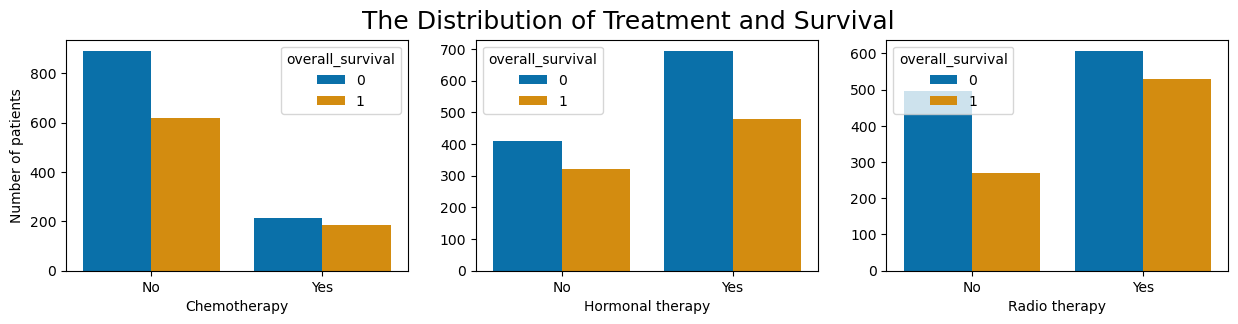

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3, figsize=(15, 3))
fig.suptitle('The Distribution of Treatment and Survival', fontsize=18)

sns.countplot(x='chemotherapy', hue='overall_survival', data=metabric_df, palette='colorblind', ax=ax[0], saturation=0.90)
ax[0].set_xticklabels(['No', 'Yes'])
ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')

sns.countplot(x='hormone_therapy', hue='overall_survival', data=metabric_df, palette='colorblind', ax=ax[1], saturation=0.90)
ax[1].set_xticklabels(['No', 'Yes'])
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')

sns.countplot(x='radio_therapy', hue='overall_survival', data=metabric_df, palette='colorblind', ax=ax[2], saturation=0.90)
ax[2].set_xticklabels(['No', 'Yes'])
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()


Chemotherapy Treatment

There's a substantial contrast between the died and survived classes for patients who received chemotherapy compared to those without it.
The count of patients in the died class without chemotherapy surpasses 800, whereas patients in the died class with chemotherapy are relatively lower, just over 200.

Hormonal Therapy

Similar to chemotherapy, there's a noticeable difference between the died and survived classes for patients with hormonal therapy compared to those without it.
Patients in the died class with hormonal therapy are relatively high, just under 700, whereas those in the survived class with hormonal therapy are somewhat lower, a little over 400.

Radiotherapy

The distinction between the died and survived classes is considerable for patients receiving radiotherapy versus those without it.
The count of patients in the died class, both with and without radiotherapy, is the highest compared to other therapy methods.

Classification of clinical attributes

In [37]:
categorical_columns = metabric_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id', 'death_from_cancer']
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns]

# Getting dummies for all categorical columns
dummies_df = pd.get_dummies(metabric_df.drop('patient_id', axis=1), columns=categorical_columns, dummy_na=True)
dummies_df.dropna(inplace=True)


In [38]:
from sklearn.model_selection import train_test_split

X = dummies_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_df['overall_survival']

# Using stratify for y to maintain equal class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


In [63]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print("\n")
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Random Forest Classifier
    
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Extra Trees Classifier
   
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### AdaBoost Classifier
    
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### SVC Classifier
    
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
    #bar chart of accuracy scores
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    
# a function that takes a dataframe and plots histograms for all columns 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column].dropna(), color= color_hist ) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()
    
    
# a function that takes a dataframe and plots barplot for all columns 
def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(dataframe[column].dropna(), color= color_hist, ax=ax[i], hue=dataframe['eventdeath']) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show() 


K Neighbors Classifier Model:
CV scores:  [0.6875     0.68181818 0.68571429 0.65714286 0.69142857]
CV Standard Deviation:  0.012187472727458442

CV Mean score:  0.6807207792207792
Train score:    1.0
Test score:     0.6458333333333334



Confusion Matrix: 
[[203  42]
 [111  76]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       245
           1       0.64      0.41      0.50       187

    accuracy                           0.65       432
   macro avg       0.65      0.62      0.61       432
weighted avg       0.65      0.65      0.63       432


Logistic Regression Model:


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

CV scores:  [0.73863636 0.71590909 0.74285714 0.72       0.74857143]
CV Standard Deviation:  0.012902020588548524

CV Mean score:  0.7331948051948053
Train score:    0.7765108323831242
Test score:     0.7777777777777778



Confusion Matrix: 
[[201  44]
 [ 52 135]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       245
           1       0.75      0.72      0.74       187

    accuracy                           0.78       432
   macro avg       0.77      0.77      0.77       432
weighted avg       0.78      0.78      0.78       432


Decision Tree Classifier Model:
CV scores:  [0.64772727 0.63068182 0.66285714 0.73142857 0.70285714]
CV Standard Deviation:  0.03692017070506598

CV Mean score:  0.6751103896103896
Train score:    1.0
Test score:     0.6898148148148148



Confusion Matrix: 
[[183  62]
 [ 72 115]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.

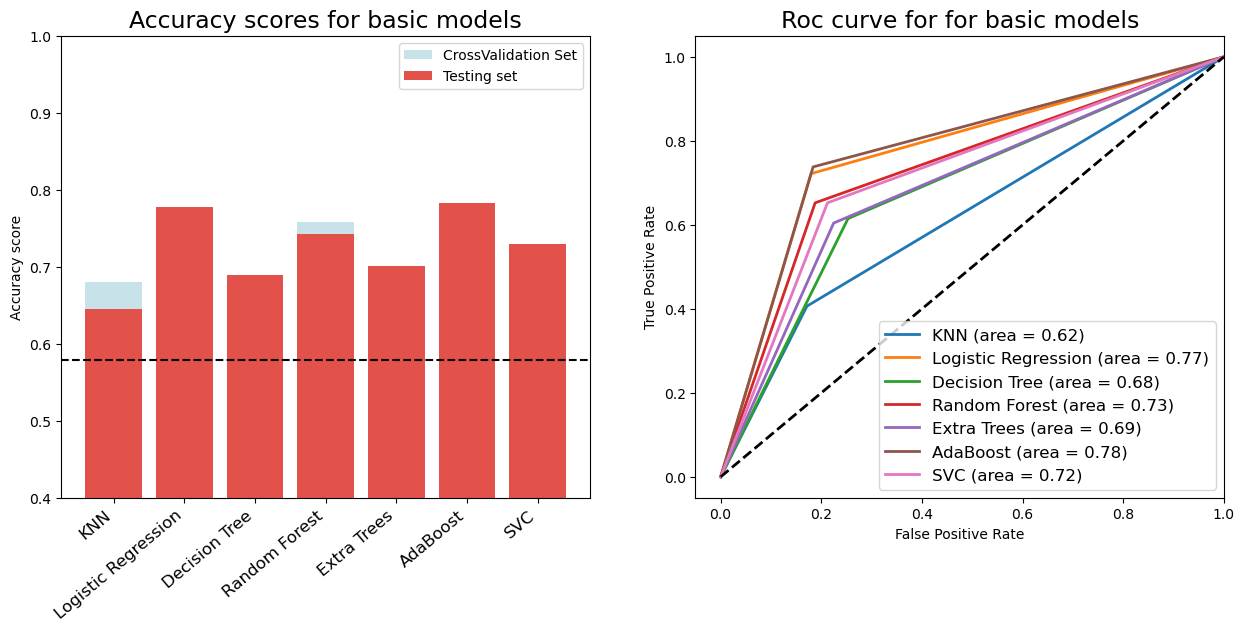

In [64]:
basic_classifiers( X_train, X_test, y_train, y_test, kf)

Logistic regression model preformed the best with accuracy of 0.777 and AUC of 0.777, KNN having the lowest accuracy of 0.64, and AUC of 0.62